

### > **RFM-анализ и подготовка рекомендаций по увеличению LTV**

### >**Выполнила: Софья Марцинович** 







## Формулировка задания:

Софья, добрый день!

Как и обсуждали с Андреем на встрече, направляю задание.
Представьте, что перед командой Яндекс.Маркета стоит задача по увеличению LTV за счет уменьшения оттока пользователей и увеличения частоты контакта. К вам приходит менеджер и просит провести исследование и ответить на вопрос, каким способом можно достичь указанной цели.

Вам необходимо сделать RFM-анализ и подготовить рекомендации команде сервиса. Предложите хотя бы один проект по увеличению LTV и оцените потенциальную пользу от этого проекта. Рекомендации по увеличению монетизируемости без увеличения частоты контакта так же приветствуются.

В приложенном файле ( https://drive.google.com/file/d/0B1to5U2MbtNcVzg1OUlmUXpDNTA/view ) собраны данные об активности пользователей основного сайта Яндекс.Маркета.

Поля:
timestamp хита
user_id
url - url хита или "click", если пользователь перешел в интернет-магазин
geo_id - идентификатор региона пользователя
category - идентификатор категории
price - стоимость клика, если пользователь перешел в интернет-магазин

Результаты анализа оформите, пожалуйста, в виде презентации и рассказа команде о результатах.

Важный момент, для первичной обработки данных необходимо использовать именно Python (не R) и приложить получившиеся скрипты.

Будут вопросы - пишите, звоните.

про гео - https://drive.google.com/file/d/0B4aWL_GsKfeIWFJmUGo1T2VHYm8/view
про категории - https://drive.google.com/file/d/0B4aWL_GsKfeIWlJRTUE1X1YyREk/view

## Некоторые пояснения

Отчет о проделанном исследовании оформлен в виде notebook-а с расширением ".ipynb", который был создан с помощью https://colab.research.google.com .

К этому notebook-у прилагаются файлы:
* new_rfm-chunk100000.csv
* new_rfm-chunk200000.csv
* new_rfm-chunk300000.csv
* new_rfm-chunk400000.csv
* new_rfm-chunk500000.csv
* new_rfm-chunk600000.csv
* new_rfm-chunk700000.csv
* new_rfm-chunk800000.csv
* new_rfm-chunk900000.csv
* new_rfm-chunk1000000.csv
* new_rfm-chunk1100000.csv
* new_rfm-chunk1200000.csv
* new_rfm-chunk1300000.csv
* new_rfm-chunk1400000.csv
* new_rfm-chunk1500000.csv
* new_rfm-chunk1600000.csv
* new_rfm-chunk1700000.csv
* new_rfm-chunk1800000.csv
* new_rfm-chunk1900000.csv
* new_rfm-chunk2000000.csv
* rfm_clicks_only.csv
* sample-orders_28MARCH.csv
* rfm-segments2014.csv

Каждый из разделов ниже может запускаться независимо от других.

## Работа с файлом "rfm.tsv"

Поскольку файл rfm большой, то для работы потребовалось разделить его на несколько маленьких с помощью команды в консоли:
>`sed -n 1,1000p rfm.tsv > rfm+chunk1000.tsv`

Далее меняем расширение файла на csv, проверяем в LibreOfficeCаlc чтобы разделение было через ТАБ. 
Присоединяем к файлу header, пользуясь подсказкой из e-mail.
Загружаем файл в Colab.
При загрузке файла ставим команду `sep='\t'`.  Если разделение через запятую, никакой команды не ставим. 





In [0]:
%matplotlib inline
import pandas as pd
import numpy as np

1. ЗАГРУЗКА НАРЕЗАННЫХ ФАЙЛОВ (первая часть, 10 файлов)
new_rfm-chunk100000.csv - new_rfm-chunk1000000.csv 

In [0]:
rfm_data1 = pd.read_csv('new_rfm-chunk100000.csv', sep='\t', error_bad_lines=False)
rfm_data2 = pd.read_csv('new_rfm-chunk200000.csv', sep='\t', error_bad_lines=False)
rfm_data3 = pd.read_csv('new_rfm-chunk300000.csv', sep='\t', error_bad_lines=False)
rfm_data4 = pd.read_csv('new_rfm-chunk400000.csv', sep='\t', error_bad_lines=False)
rfm_data5 = pd.read_csv('new_rfm-chunk500000.csv', sep='\t', error_bad_lines=False)
rfm_data6 = pd.read_csv('new_rfm-chunk600000.csv', sep='\t', error_bad_lines=False)
rfm_data7 = pd.read_csv('new_rfm-chunk700000.csv', sep='\t', error_bad_lines=False)
rfm_data8 = pd.read_csv('new_rfm-chunk800000.csv', sep='\t', error_bad_lines=False)
rfm_data9 = pd.read_csv('new_rfm-chunk900000.csv', sep='\t', error_bad_lines=False)
rfm_data10 = pd.read_csv('new_rfm-chunk1000000.csv', sep='\t', error_bad_lines=False)


Проверка размерности:

In [32]:
rfm_data1.shape

(100000, 6)

Объединение датафреймов 1-10:

In [0]:
rfm_data_PART1 = pd.concat([rfm_data1, rfm_data2, rfm_data3, rfm_data4, rfm_data5, rfm_data6, rfm_data7, rfm_data8, rfm_data9, rfm_data10])

Проверка размерности `rfm_data_PART1`:

In [34]:
rfm_data_PART1.shape

(1000000, 6)

In [35]:
rfm_data_PART1.head()

,Timestamp,user_id,url,geo_id,category,price
0,1380052543,00002ad98ae4290672431d702c211b4a,/_c/YwrVrj_29IVZDmKxglT53wo7Pk8.html,10000,NaN,NaN
1,1375703582,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=y5fc6079b758f5a4e3646a8...,10000,NaN,NaN
2,1374479873,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000,NaN,NaN
3,1374479892,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000,NaN,NaN
4,1374480337,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000,NaN,NaN


2. ЗАГРУЗКА НАРЕЗАННЫХ ФАЙЛОВ (вторая часть, 10 файлов) new_rfm-chunk100000.csv - new_rfm-chunk1000000.csv

In [0]:
rfm_data11 = pd.read_csv('new_rfm-chunk1100000.csv', sep='\t', error_bad_lines=False)
rfm_data12 = pd.read_csv('new_rfm-chunk1200000.csv', sep='\t', error_bad_lines=False)
rfm_data13 = pd.read_csv('new_rfm-chunk1300000.csv', sep='\t', error_bad_lines=False)
rfm_data14 = pd.read_csv('new_rfm-chunk1400000.csv', sep='\t', error_bad_lines=False)
rfm_data15 = pd.read_csv('new_rfm-chunk1500000.csv', sep='\t', error_bad_lines=False)
rfm_data16 = pd.read_csv('new_rfm-chunk1600000.csv', sep='\t', error_bad_lines=False)
rfm_data17 = pd.read_csv('new_rfm-chunk1700000.csv', sep='\t', error_bad_lines=False)
rfm_data18 = pd.read_csv('new_rfm-chunk1800000.csv', sep='\t', error_bad_lines=False)
rfm_data19 = pd.read_csv('new_rfm-chunk1900000.csv', sep='\t', error_bad_lines=False)
rfm_data20 = pd.read_csv('new_rfm-chunk2000000.csv', sep='\t', error_bad_lines=False)



Объединение датафреймов 11-20:

In [0]:
rfm_data_PART2 = pd.concat([rfm_data11, rfm_data12, rfm_data13, rfm_data14, rfm_data15, rfm_data16, rfm_data17, rfm_data18, rfm_data19, rfm_data20])

-----------------
Загрузить последующие части не удалось. Вероятно, не хватает возможностей домашнего компьютера. Далее будем работать с первой частью исходного файла, 2 млн. строк.
______

3. ОБЪЕДИНЕНИЕ ДАТАФРЕЙМОВ ` fm_data_PART1 ` и  `fm_data_PART2`

In [0]:
rfm_data_PART_12 = pd.concat([rfm_data_PART1, rfm_data_PART2])

In [39]:
rfm_data_PART_12.shape 

(1906516, 6)

In [40]:
rfm_data_PART_12.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906516 entries, 0 to 99999
Data columns (total 6 columns):
Timestamp    int64
user_id      object
url          object
geo_id       float64
category     object
price        float64
dtypes: float64(2), int64(1), object(3)
memory usage: 101.8+ MB


In [41]:
rfm_data_PART_12.head()

,Timestamp,user_id,url,geo_id,category,price
0,1380052543,00002ad98ae4290672431d702c211b4a,/_c/YwrVrj_29IVZDmKxglT53wo7Pk8.html,10000.0,NaN,NaN
1,1375703582,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=y5fc6079b758f5a4e3646a8...,10000.0,NaN,NaN
2,1374479873,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000.0,NaN,NaN
3,1374479892,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000.0,NaN,NaN
4,1374480337,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000.0,NaN,NaN


## Работа с датафреймом  `rfm_data_PART_12`

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np

Заполним пустые ячейки в столбцах 'price' и 'category'  нулями:

In [0]:
rfm_data_PART_12 = rfm_data_PART_12.fillna(0)

In [44]:
rfm_data_PART_12.head()

,Timestamp,user_id,url,geo_id,category,price
0,1380052543,00002ad98ae4290672431d702c211b4a,/_c/YwrVrj_29IVZDmKxglT53wo7Pk8.html,10000.0,0,0.0
1,1375703582,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=y5fc6079b758f5a4e3646a8...,10000.0,0,0.0
2,1374479873,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000.0,0,0.0
3,1374479892,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000.0,0,0.0
4,1374480337,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000.0,0,0.0


Работа с timestamp (тип int64).  Переведем дату в более привычный вид.  Единицы измерения: секунды.

In [0]:
rfm_data_PART_12['Timestamp'] = pd.to_datetime(rfm_data_PART_12['Timestamp'], unit='s')

In [46]:
rfm_data_PART_12.head()

,Timestamp,user_id,url,geo_id,category,price
0,2013-09-24 19:55:43,00002ad98ae4290672431d702c211b4a,/_c/YwrVrj_29IVZDmKxglT53wo7Pk8.html,10000.0,0,0.0
1,2013-08-05 11:53:02,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=y5fc6079b758f5a4e3646a8...,10000.0,0,0.0
2,2013-07-22 07:57:53,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000.0,0,0.0
3,2013-07-22 07:58:12,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000.0,0,0.0
4,2013-07-22 08:05:37,00003cb9076039f584a12c2036fd3602,/gate/cart-list.xml?sk=yd6558780959d5130b32e1a...,10000.0,0,0.0


Заметим, что столбец url - неоднородный.

Если указан путь, то соответствующее значение "price" равно нулю.
Если указан "click", то соответствующее значение "price" ненулевое.

Выберем строки, в которых в столбце url указан "click":

In [47]:
rfm_data_PART_12[rfm_data_PART_12['price']>0]

,Timestamp,user_id,url,geo_id,category,price
64,2013-03-16 06:41:49,00023fcc5c93cb4674bdad0d448272e6,click,213.0,2662954,30.0
65,2013-03-13 06:09:18,00023fcc5c93cb4674bdad0d448272e6,click,213.0,6427100,10.0
66,2013-03-14 06:17:30,00023fcc5c93cb4674bdad0d448272e6,click,213.0,6427100,10.0
67,2013-03-14 06:26:10,00023fcc5c93cb4674bdad0d448272e6,click,213.0,6427100,10.0
68,2013-03-13 09:07:52,00023fcc5c93cb4674bdad0d448272e6,click,213.0,6427100,80.0
69,2013-04-07 10:41:19,00023fcc5c93cb4674bdad0d448272e6,click,213.0,7286126,10.0
70,2013-04-07 10:33:19,00023fcc5c93cb4674bdad0d448272e6,click,213.0,7286126,73.0
71,2013-03-30 05:15:51,00023fcc5c93cb4674bdad0d448272e6,click,213.0,7812062,10.0
72,2013-04-04 05:24:43,00023fcc5c93cb4674bdad0d448272e6,click,213.0,90738,10.0
73,2013-04-04 05:24:59,00023fcc5c93cb4674bdad0d448272e6,click,213.0,90738,10.0


Количество строк с "click":

In [48]:
len(rfm_data_PART_12[rfm_data_PART_12['price'] != 0])

69237

Сохраняем этот датафрейм для последующей работы:

In [0]:
rfm = rfm_data_PART_12[rfm_data_PART_12['price']>0]

In [50]:
rfm

,Timestamp,user_id,url,geo_id,category,price
64,2013-03-16 06:41:49,00023fcc5c93cb4674bdad0d448272e6,click,213.0,2662954,30.0
65,2013-03-13 06:09:18,00023fcc5c93cb4674bdad0d448272e6,click,213.0,6427100,10.0
66,2013-03-14 06:17:30,00023fcc5c93cb4674bdad0d448272e6,click,213.0,6427100,10.0
67,2013-03-14 06:26:10,00023fcc5c93cb4674bdad0d448272e6,click,213.0,6427100,10.0
68,2013-03-13 09:07:52,00023fcc5c93cb4674bdad0d448272e6,click,213.0,6427100,80.0
69,2013-04-07 10:41:19,00023fcc5c93cb4674bdad0d448272e6,click,213.0,7286126,10.0
70,2013-04-07 10:33:19,00023fcc5c93cb4674bdad0d448272e6,click,213.0,7286126,73.0
71,2013-03-30 05:15:51,00023fcc5c93cb4674bdad0d448272e6,click,213.0,7812062,10.0
72,2013-04-04 05:24:43,00023fcc5c93cb4674bdad0d448272e6,click,213.0,90738,10.0
73,2013-04-04 05:24:59,00023fcc5c93cb4674bdad0d448272e6,click,213.0,90738,10.0


Выводим содержимое нового датафрейма в файл `'rfm_clicks_only.csv'`, избавляемся от старой индексации:

In [0]:
 rfm.to_csv('rfm_clicks_only.csv', index=False)


## Работа с файлом `'rfm_clicks_only.csv'`
## RFM-анализ

Для RFM-анализа нужны следующие параметры: Recency, Frequency, MonetaryValue

1. Recency - время с момента последней покупки. Для сравнения можно использовать значения datastamp.

2. Frequency - общее количество покупок (в нашем случае, кликов) для клиента. Так, в строках 64-88 таблицы 37 одним клиентом (user_id = 00023fcc5c93cb4674bdad0d448272e6) совершено 25 покупок.

3. MonetaryValue - общее количество денег для одного клиента. Так, юзер (user_id = 00023fcc5c93cb4674bdad0d448272e6) за 25 кликов принес 425 рублей ( 30+10+10+10+80+....).

Будем использовать готовую программу, размещенную на GitHub: https://github.com/joaolcorreia/RFM-analysis (автор делится ссылкой в своей статье: https://joaocorreia.io/blog/rfm-analysis-increase-sales-by-segmenting-your-customers.html). 

Нужно подготовить csv файл со следующими заголовками столбцов: `order_date, order_id, customer, grand_total`

При этом будет следующее соответствие с нашими наименованиями:

* order_date <-- timestamp
* order_id <-- url 
* customer <-- user_id
* grand_total <-- price

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np

Загрузка файла `"rfm_clicks_only.csv"`:

In [0]:
rfm = pd.read_csv('rfm_clicks_only.csv')

In [54]:
rfm.shape

(69237, 6)

In [55]:
rfm.head()

,Timestamp,user_id,url,geo_id,category,price
0,2013-03-16 06:41:49,00023fcc5c93cb4674bdad0d448272e6,click,213.0,2662954.0,30.0
1,2013-03-13 06:09:18,00023fcc5c93cb4674bdad0d448272e6,click,213.0,6427100.0,10.0
2,2013-03-14 06:17:30,00023fcc5c93cb4674bdad0d448272e6,click,213.0,6427100.0,10.0
3,2013-03-14 06:26:10,00023fcc5c93cb4674bdad0d448272e6,click,213.0,6427100.0,10.0
4,2013-03-13 09:07:52,00023fcc5c93cb4674bdad0d448272e6,click,213.0,6427100.0,80.0


Удаляем столбцы 'geo_id' и 'category':

In [0]:
rfm = rfm.drop('geo_id', axis=1)
rfm = rfm.drop('category', axis=1)

Переименуем столбцы и изменим порядок в соответствии с договоренностью выше:

In [0]:
rfm = rfm.rename(columns = {'Timestamp':'order_date'})
rfm = rfm.rename(columns = {'url':'order_id'})
rfm = rfm.rename(columns = {'user_id':'customer'})
rfm = rfm.rename(columns = {'price':'grand_total'})

In [58]:
list(rfm.columns.values)

['order_date', 'customer', 'order_id', 'grand_total']

In [0]:
rfm = rfm[['order_date', 'order_id', 'customer', 'grand_total']]

In [60]:
rfm

,order_date,order_id,customer,grand_total
0,2013-03-16 06:41:49,click,00023fcc5c93cb4674bdad0d448272e6,30.0
1,2013-03-13 06:09:18,click,00023fcc5c93cb4674bdad0d448272e6,10.0
2,2013-03-14 06:17:30,click,00023fcc5c93cb4674bdad0d448272e6,10.0
3,2013-03-14 06:26:10,click,00023fcc5c93cb4674bdad0d448272e6,10.0
4,2013-03-13 09:07:52,click,00023fcc5c93cb4674bdad0d448272e6,80.0
5,2013-04-07 10:41:19,click,00023fcc5c93cb4674bdad0d448272e6,10.0
6,2013-04-07 10:33:19,click,00023fcc5c93cb4674bdad0d448272e6,73.0
7,2013-03-30 05:15:51,click,00023fcc5c93cb4674bdad0d448272e6,10.0
8,2013-04-04 05:24:43,click,00023fcc5c93cb4674bdad0d448272e6,10.0
9,2013-04-04 05:24:59,click,00023fcc5c93cb4674bdad0d448272e6,10.0


Приводим столбец "order_date" к формату year-month-day:

In [0]:
rfm['order_date'] = rfm['order_date'].str.split(' ').str[0]

In [62]:
rfm

,order_date,order_id,customer,grand_total
0,2013-03-16,click,00023fcc5c93cb4674bdad0d448272e6,30.0
1,2013-03-13,click,00023fcc5c93cb4674bdad0d448272e6,10.0
2,2013-03-14,click,00023fcc5c93cb4674bdad0d448272e6,10.0
3,2013-03-14,click,00023fcc5c93cb4674bdad0d448272e6,10.0
4,2013-03-13,click,00023fcc5c93cb4674bdad0d448272e6,80.0
5,2013-04-07,click,00023fcc5c93cb4674bdad0d448272e6,10.0
6,2013-04-07,click,00023fcc5c93cb4674bdad0d448272e6,73.0
7,2013-03-30,click,00023fcc5c93cb4674bdad0d448272e6,10.0
8,2013-04-04,click,00023fcc5c93cb4674bdad0d448272e6,10.0
9,2013-04-04,click,00023fcc5c93cb4674bdad0d448272e6,10.0


Выводим содержимое датафрейма в файл ` 'sample-orders_28MARCH.csv'`:




In [0]:
 rfm.to_csv('sample-orders_28MARCH.csv', index=False)


----------------------
Полученный файл  ` 'sample-orders_28MARCH.csv'` обрабатываем с помощью программы RFM-analysis.py

Команда: `python RFM-analysis.py -i sample-orders28MARCH.csv -o rfm-segments2014.csv -d "2014-01-01"`

На выходе получаем файл` 'rfm-segments28MARCH.csv'`, на основе которого строим предположения и рекомендации.

---------------------------


## Работа с файлом `'rfm-segments2014.csv'`

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np

Загрузка файла ` 'rfm-segments2014.csv'`:

In [0]:
rfm_segments = pd.read_csv('rfm-segments2014.csv')

In [66]:
rfm_segments

,customer,frequency,recency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,00023fcc5c93cb4674bdad0d448272e6,25,70,425.0,2,1,1,211
1,00029bdb868e12bb62b8c574b274dbb7,5,363,90.0,4,2,2,422
2,00035d94fcd7e814d56531cf95b81ceb,3,151,159.0,3,2,2,322
3,00045ac92fb4ed78bc66c40f52775acd,5,59,50.0,2,2,3,223
4,00056ac58d63ef1d4b5fb73324bf845d,11,93,145.0,2,1,2,212
5,000583e5a29b33f1f608d6c001e56f31,13,260,130.0,4,1,2,412
6,0005ed3cc99ddb0def30bf53466366ee,6,24,75.0,1,1,2,112
7,000ae3d1d7986733826f02b7bddef036,1,4,22.0,1,4,3,143
8,000b71102168827ca5271edbdc20c908,1,240,10.0,3,4,4,344
9,000cc187d45637f927e56b9fa0ef5f88,1,85,11.0,2,4,4,244


In [67]:
rfm_segments.shape

(10697, 8)

Замечание: из 2 млн. исходных строк получили 10697 уникальных id c ненулевым MonetaryValue.

In [68]:
10697/2000000
#0.53%

0.0053485

Удалим столбцы 'frequency', 'recency', 'monetary_value':

In [0]:
rfm_segments = rfm_segments.drop('frequency', axis=1)
rfm_segments = rfm_segments.drop('recency', axis=1)
rfm_segments = rfm_segments.drop('monetary_value', axis=1)

In [70]:
rfm_segments

,customer,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,00023fcc5c93cb4674bdad0d448272e6,2,1,1,211
1,00029bdb868e12bb62b8c574b274dbb7,4,2,2,422
2,00035d94fcd7e814d56531cf95b81ceb,3,2,2,322
3,00045ac92fb4ed78bc66c40f52775acd,2,2,3,223
4,00056ac58d63ef1d4b5fb73324bf845d,2,1,2,212
5,000583e5a29b33f1f608d6c001e56f31,4,1,2,412
6,0005ed3cc99ddb0def30bf53466366ee,1,1,2,112
7,000ae3d1d7986733826f02b7bddef036,1,4,3,143
8,000b71102168827ca5271edbdc20c908,3,4,4,344
9,000cc187d45637f927e56b9fa0ef5f88,2,4,4,244


Таблица 'Recency' x 'Frequency' в процентах от общего числа клиентов:

In [0]:
a11 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==1) & (rfm_segments['F_Quartile']==1)])/rfm_segments.shape[0]*100))+'%'
a12 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==1) & (rfm_segments['F_Quartile']==2)])/rfm_segments.shape[0]*100))+'%'
a13 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==1) & (rfm_segments['F_Quartile']==3)])/rfm_segments.shape[0]*100))+'%'
a14 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==1) & (rfm_segments['F_Quartile']==4)])/rfm_segments.shape[0]*100))+'%'
a21 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==2) & (rfm_segments['F_Quartile']==1)])/rfm_segments.shape[0]*100))+'%'
a22 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==2) & (rfm_segments['F_Quartile']==2)])/rfm_segments.shape[0]*100))+'%'
a23 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==2) & (rfm_segments['F_Quartile']==3)])/rfm_segments.shape[0]*100))+'%'
a24 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==2) & (rfm_segments['F_Quartile']==4)])/rfm_segments.shape[0]*100))+'%'
a31 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==3) & (rfm_segments['F_Quartile']==1)])/rfm_segments.shape[0]*100))+'%'
a32 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==3) & (rfm_segments['F_Quartile']==2)])/rfm_segments.shape[0]*100))+'%'
a33 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==3) & (rfm_segments['F_Quartile']==3)])/rfm_segments.shape[0]*100))+'%'
a34 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==3) & (rfm_segments['F_Quartile']==4)])/rfm_segments.shape[0]*100))+'%'
a41 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==4) & (rfm_segments['F_Quartile']==1)])/rfm_segments.shape[0]*100))+'%'
a42 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==4) & (rfm_segments['F_Quartile']==2)])/rfm_segments.shape[0]*100))+'%'
a43 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==4) & (rfm_segments['F_Quartile']==3)])/rfm_segments.shape[0]*100))+'%'
a44 = str(round(len(rfm_segments[(rfm_segments['R_Quartile']==4) & (rfm_segments['F_Quartile']==4)])/rfm_segments.shape[0]*100))+'%'
d = {'R=1': np.array([a11, a12, a13, a14]), 'R=2': np.array([a21, a22, a23, a24]), 'R=3': np.array([a31,a32, a33, a34]), 'R=4': np.array([a41, a42, a43, a44])}
R_F = pd.DataFrame(d, index=['F=1','F=2','F=3','F=4'])
#R_F.set_index('R\F', inplace=True)
#R_F = R_F.fillna(0)

In [72]:
#R - Recency; F - Frequency
R_F

,R=1,R=2,R=3,R=4
F=1,9%,7%,5%,4%
F=2,5%,5%,6%,6%
F=3,4%,4%,4%,4%
F=4,8%,9%,9%,11%


In [73]:
# BEST USERS кол-во:
BEST_USERS_Number = len(rfm_segments[rfm_segments['RFMClass']==111])
BEST_USERS_Number

714

Интерпретация численных значений:

Рассмотрим 6 ключевых групп клиентов:

* Если R_Quartile =1 и F_Quartile=1 и M_Quartile=1 (RFMClass=111), то Best User

* Если F_Quartile=1, то Loyal User

* Если M_Quartile=1, то Big Spender

* Если R_Quartile =3 и F_Quartile=1 и M_Quartile=1 (RFMClass=311), то Almost Lost

* Если R_Quartile =4 и F_Quartile=1 и M_Quartile=1 (RFMClass=411), то Lost User

* Если R_Quartile =4 и F_Quartile=4 и M_Quartile=4 (RFMClass=444), то Lost Cheap User

In [74]:
# BEST USERS список:
BEST_USERS = rfm_segments[rfm_segments['RFMClass']==111]
BEST_USERS.head()

,customer,R_Quartile,F_Quartile,M_Quartile,RFMClass
15,00171bc1d3983650095137b2a7bdf70b,1,1,1,111
33,002c9f2b6fd4b4a5aa409e4c279696f8,1,1,1,111
38,003360be7757cf27cb7985a750656d0e,1,1,1,111
65,004ece9d1ba4bad8ce5087116baf0ddd,1,1,1,111
96,006d0e43a2c80aef2a4ae3ba67cb78c9,1,1,1,111


In [75]:
# LOYAL USERS кол-во:
LOYAL_USERS_Number = len(rfm_segments[rfm_segments['F_Quartile']==1])
LOYAL_USERS_Number

2661

In [76]:
# LOYAL USERS список:
LOYAL_USERS = rfm_segments[rfm_segments['F_Quartile']==1]
LOYAL_USERS.head()

,customer,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,00023fcc5c93cb4674bdad0d448272e6,2,1,1,211
4,00056ac58d63ef1d4b5fb73324bf845d,2,1,2,212
5,000583e5a29b33f1f608d6c001e56f31,4,1,2,412
6,0005ed3cc99ddb0def30bf53466366ee,1,1,2,112
10,000f7e1bee6c4166a6d82bfdfbbc0e58,2,1,2,212


In [77]:
# BIG SPENDERS кол-во:
BIG_SPENDERS_Number = len(rfm_segments[rfm_segments['M_Quartile']==1])
BIG_SPENDERS_Number

2662

In [78]:
# BIG SPENDERS список:
BIG_SPENDERS = rfm_segments[rfm_segments['M_Quartile']==1]
BIG_SPENDERS.head()

,customer,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,00023fcc5c93cb4674bdad0d448272e6,2,1,1,211
15,00171bc1d3983650095137b2a7bdf70b,1,1,1,111
19,0019e537ea4d6442d59c110c03e135fb,4,1,1,411
20,001a792b4feb640d80dc916f7499ca5d,1,2,1,121
21,001c7f00e2948d3a89f856699d6db1ec,1,2,1,121


In [79]:
# ALMOST LOST кол-во:
ALMOST_LOST_Number = len(rfm_segments[rfm_segments['RFMClass']==311])
ALMOST_LOST_Number

378

In [80]:
# ALMOST LOST список:
ALMOST_LOST = rfm_segments[rfm_segments['RFMClass']==311]
ALMOST_LOST.head()

,customer,R_Quartile,F_Quartile,M_Quartile,RFMClass
81,0060fb0908f44d53e2df6788ee155aae,3,1,1,311
87,0066d2ff9f99eaf8eee24354f9d27bc5,3,1,1,311
115,008c25d59def1d836800d07bf7e1be3c,3,1,1,311
119,0091520cfbab077ddeab5990dc8ae7cb,3,1,1,311
124,0095cc7329a09162be78d1f691b36e9b,3,1,1,311


In [81]:
# LOST USERS кол-во:
LOST_USERS_Number = len(rfm_segments[rfm_segments['RFMClass']==411])
LOST_USERS_Number

259

In [82]:
# LOST USERS список:
LOST_USERS = rfm_segments[rfm_segments['RFMClass']==411]
LOST_USERS.head()

,customer,R_Quartile,F_Quartile,M_Quartile,RFMClass
19,0019e537ea4d6442d59c110c03e135fb,4,1,1,411
64,004e3b4f24cf9d1c565641a213397756,4,1,1,411
130,009d205b77d4b8f44946f203191ac228,4,1,1,411
142,00ac4a46e049f5e6c36bec6db637f948,4,1,1,411
205,0101be95bedcda0a20be36f3db2db236,4,1,1,411


In [83]:
# LOST CHEAP USERS кол-во:
LOST_CHEAP_USERS_Number = len(rfm_segments[rfm_segments['RFMClass']==444])
LOST_CHEAP_USERS_Number

792

In [84]:
# LOST CHEAP USERS список:
LOST_CHEAP_USERS = rfm_segments[rfm_segments['RFMClass']==444]
LOST_CHEAP_USERS.head()

,customer,R_Quartile,F_Quartile,M_Quartile,RFMClass
24,002027dd2a6aac813fad38773f6faa9f,4,4,4,444
28,0026053fb37239147ba73bd6d92db875,4,4,4,444
39,0034823dc5b8852c4969a89b3403a6cd,4,4,4,444
104,0074617515100efcb4763dc64f3e2f54,4,4,4,444
110,007ea07a747ad3a2da50ffe14ead70a0,4,4,4,444


Посчитаем клиентов, которые не попали ни в одну из рассмотренных категорий. Назовем их OTHERS:

In [0]:
ALL_USERS_Number = len(rfm_segments[rfm_segments['RFMClass'] != 0])
OTHERS_Number = ALL_USERS_Number - BEST_USERS_Number - LOYAL_USERS_Number -  BIG_SPENDERS_Number - ALMOST_LOST_Number - LOST_USERS_Number - LOST_CHEAP_USERS_Number

In [86]:
OTHERS_Number

3231

Построим таблицу по категориям клиентов:

In [0]:
CAT = pd.DataFrame({'USERS_CAT':['BEST_USERS', 'LOYAL_USERS', 'BIG_SPENDERS', 'ALMOST_LOST', 'LOST_USERS', 'LOST_CHEAP_USERS'], 'CAT_NUM':[BEST_USERS_Number, LOYAL_USERS_Number, BIG_SPENDERS_Number, ALMOST_LOST_Number, LOST_USERS_Number, LOST_CHEAP_USERS_Number]})

In [0]:
CAT = CAT[['USERS_CAT', 'CAT_NUM']]
CAT.set_index('USERS_CAT', inplace=True)

In [89]:
CAT

,CAT_NUM
USERS_CAT,
BEST_USERS,714
LOYAL_USERS,2661
BIG_SPENDERS,2662
ALMOST_LOST,378
LOST_USERS,259
LOST_CHEAP_USERS,792


Строим диаграмму распределения пользователей по категориям:

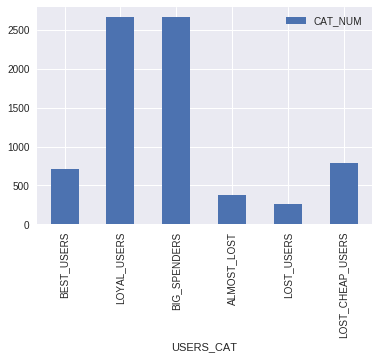

In [90]:
CAT.plot(kind='bar')

## Рекомендации по результатам RFM-анализа

***BEST_USERS*** 

Это клиенты, совершившие последние покупки, делающие это чаще остальных, и тратящие денег больше остальных.

Ценовые стимулы не требуются, вводятся новые продукты и программа скидок для постоянных клиентов.

***LOYAL_USERS***

Это клиенты, совершившие последние покупки.

Прибыль можно увеличить, подняв цену за клик. Лучше всего делать это плавно, но постоянно. Также нужны усилия по поддержке их лояльности, нужно не давать забывать о себе. Т.е. увеличиваем R и M. Реклама типа "Купи сейчас, завтра будет дороже!", "Надо брать!", и т.д.

***BIG_SPENDERS***

Это клиенты, тратящие больше остальных.

Нужно помочь им тратить еще больше, поэтому продвигаем самые дорогие, "крутые" продукты. 

***ALMOST_LOST***

Это клиенты, которые не совершали покупки некоторое время, но покупали часто и тратили больше остальных.

Стараемся вернуть активность ценовыми стимулами.

***LOST_USERS***

Это клиенты, которые не совершали покупки давно, но покупали часто и тратили больше остальных.

Стараемся вернуть активность ценовыми стимулами.

***LOST_CHEAP_USERS***

Это потерянные экономные клиенты, которые не совершали покупки давно, покупали мало и тратили меньше остальных.

Не стоит прикладывать много усилий, чтобы их вернуть.

## Недоработки (или недостатки) проведенного исследования

1. Была обработана только часть данных (2 млн. строк, что ~20%) в силу недостаточной мощности компьютера.
2. Не удалось разобраться, как следовало бы применить информацию по гео-локации и категориям продуктов ("про гео - https://drive.google.com/file/d/0B4aWL_GsKfeIWFJmUGo1T2VHYm8/view про категории - https://drive.google.com/file/d/0B4aWL_GsKfeIWlJRTUE1X1YyREk/view  "). 
3. Недостаток практических навыков работы с Pandas не позволил реализовать красивую визуализацию, как сделано, например, здесь: https://public.tableau.com/profile/joaocorreia#!/vizhome/TableauSuperstoreRFMAnalysis_0/TableauSuperstoreRFMAnalysis


## Перечень использованных материалов

* https://joaocorreia.io/blog/rfm-analysis-increase-sales-by-segmenting-your-customers.html  - RFM-analysis

* https://lpgenerator.ru/blog/2016/08/04/kak-uvelichit-prodazhi-segmentaciya-klientov-i-rfm-analiz/ - RFM-analysis

* https://www.carrotquest.io/blog/ltv-lifetime-value-schitaem/ - про LTV

* https://habr.com/ru/post/428159/  - визуализация данных на tableu

* https://www.quora.com/What-are-some-good-resources-to-learn-how-to-perform-an-RFM-recency-frequency-monetary-analysis-in-SQL-or-Python  - визуализация данных

* https://public.tableau.com/profile/joaocorreia#!/vizhome/TableauSuperstoreRFMAnalysis_0/TableauSuperstoreRFMAnalysis  - таблица (презентация)

* https://habr.com/ru/post/61391/ - про timestamp 
 и еще несколько полезных статей...